<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/random_forest_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages("DBI")
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the depende

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(utils)
library(terra)

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE

Loading required package: sp

terra 1.7.78


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset




In [3]:
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f96a8f0d329e8b4c520f65364ff18124&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWN2RE1yRHhjMlNMZEVmd0p1UTNyUS1ibW5heGpPSlFpNHFhMnVUOU04OEpKdC10R19NODRaeTZDWnBGYjA0UXBWNFZYUSIsInN0YXRlIjoiZjk2YThmMGQzMjllOGI0YzUyMGY2NTM2NGZmMTgxMjQifQ==


In [4]:
# https://drive.google.com/file/d/1jS2G5WoTspv9SAe5p9ge5CU2BcMXqO-I/view?usp=drive_link
drive_download(file = as_id('1jS2G5WoTspv9SAe5p9ge5CU2BcMXqO-I'), path =  '/content/oregon_disturbance.gpkg', overwrite = TRUE)

File downloaded:

• gedi_intersection.gpkg <id: 1jS2G5WoTspv9SAe5p9ge5CU2BcMXqO-I>

Saved locally as:

• /content/oregon_disturbance.gpkg



In [5]:
# https://drive.google.com/file/d/194ZZ53SpgAWr9NgcCQO7ElpEiX7W8pny/view?usp=drive_link
drive_download(file = as_id('194ZZ53SpgAWr9NgcCQO7ElpEiX7W8pny'), path =  '/content/Oregon_SRTM_mTPI_Buffer.tif', overwrite = TRUE)

File downloaded:

• Oregon_SRTM_mTPI_Buffer.tif <id: 194ZZ53SpgAWr9NgcCQO7ElpEiX7W8pny>

Saved locally as:

• /content/Oregon_SRTM_mTPI_Buffer.tif



In [6]:
# https://drive.google.com/file/d/1IxW-3KryNPQOxF2qabPWZ50yifL-9FCA/view?usp=drive_link
drive_download(file = as_id('1IxW-3KryNPQOxF2qabPWZ50yifL-9FCA'), path =  '/content/Oregon_disturbance_TimeSeries_Export_Full.tif', overwrite = TRUE)

File downloaded:

• Oregon_disturbance_TimeSeries_Export_Full.tif
  <id: 1IxW-3KryNPQOxF2qabPWZ50yifL-9FCA>

Saved locally as:

• /content/Oregon_disturbance_TimeSeries_Export_Full.tif



In [7]:
# https://drive.google.com/file/d/1BS1dlRA0r6i9LOwB6OXfT4vZirbtPI2r/view?usp=drive_link
drive_download(file = as_id('1BS1dlRA0r6i9LOwB6OXfT4vZirbtPI2r'), path =  '/content/Oregon_elevation.tif', overwrite = TRUE)

File downloaded:

• Oregon_elevation.tif <id: 1BS1dlRA0r6i9LOwB6OXfT4vZirbtPI2r>

Saved locally as:

• /content/Oregon_elevation.tif



In [26]:
# https://drive.google.com/file/d/1TM0cZQhMl7Q79roTMmHkurheoWfCqE7e/view?usp=sharing

drive_download(file = as_id('1TM0cZQhMl7Q79roTMmHkurheoWfCqE7e'), path =  '/content/Oregon_climate.tif', overwrite = TRUE)

Auto-refreshing stale OAuth token.

File downloaded:

• Oregon_Average_Climate_out1_1958_to_2023.tif
  <id: 1TM0cZQhMl7Q79roTMmHkurheoWfCqE7e>

Saved locally as:

• /content/Oregon_climate.tif



In [8]:
gedi_dist_gpkg <- st_read('/content/oregon_disturbance.gpkg')

Reading layer `gedi_intersection' from data source 
  `/content/oregon_disturbance.gpkg' using driver `GPKG'
Simple feature collection with 1711491 features and 94 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -123.6631 ymin: 43.85916 xmax: -121.7653 ymax: 44.90617
Geodetic CRS:  WGS 84


In [9]:
elevation_tif <- stack('/content/Oregon_elevation.tif')

In [10]:
aspect_tif <- terrain(elevation_tif$elevation,'aspect',"degrees")
slope_tif <- terrain(elevation_tif$elevation,'slope',"degrees")

In [11]:
esa_tif <- stack(elevation_tif$elevation,slope_tif,aspect_tif)

In [12]:
esa_terra <- esa_tif %>% rast

In [13]:
tpi_tif <- stack('/content/Oregon_SRTM_mTPI_Buffer.tif')

In [14]:
tpi_terra <- tpi_tif %>% rast

In [29]:
climate_tif <- stack('/content/Oregon_climate.tif')

In [28]:
# climate_tif

In [30]:
climate_terra <- climate_tif %>% rast

In [17]:
gedi_dist_dt <- gedi_dist_gpkg %>% data.table

In [18]:
gedi_dist_dt <- gedi_dist_dt[agbd !=-9999]

In [19]:
buffer_gedi_dist_dt <- gedi_dist_dt %>% st_as_sf  %>% st_transform('EPSG:6339') %>% st_buffer(12.5) %>% st_transform(st_crs(esa_tif))

In [20]:
esa_gpkg <- exact_extract(esa_terra,buffer_gedi_dist_dt,'mean')

Cannot preload entire working area of 82128423 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


In [21]:
tpi_gpkg <- exact_extract(tpi_terra,buffer_gedi_dist_dt,'mean')

  |======================================================================| 100%


In [22]:
climate_tif

class      : RasterStack 
dimensions : 118, 213, 25134, 532  (nrow, ncol, ncell, nlayers)
resolution : 0.008983153, 0.008983153  (x, y)
extent     : -123.6711, -121.7577, 43.85575, 44.91576  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : X198401_aet, X198401_def, X198401_pdsi, X198401_pet, X198401_pr, X198401_ro, X198401_soil, X198401_srad, X198401_swe, X198401_tmmn, X198401_tmmx, X198401_vap, X198401_vpd, X198401_vs, X198501_aet, ... 


In [31]:
climate_gpkg <- exact_extract(climate_terra,buffer_gedi_dist_dt,'mean')

  |======================================================================| 100%


In [32]:
climate_years <- climate_gpkg %>% names %>% gsub('mean.X','',.) %>% lapply(function(x){x %>% strsplit('_') %>% unlist}) %>% lapply(function(x){x[1]}) %>% substr(1,4)

In [33]:
climate_years

[1] "1958" "1958" "1958" "1958" "1958" "1958" "1958" "1958" "1958" "1958"
 [11] "1958" "1958" "1958" "1958" "1959" "1959" "1959" "1959" "1959" "1959"
 [21] "1959" "1959" "1959" "1959" "1959" "1959" "1959" "1959" "1960" "1960"
 [31] "1960" "1960" "1960" "1960" "1960" "1960" "1960" "1960" "1960" "1960"
 [41] "1960" "1960" "1961" "1961" "1961" "1961" "1961" "1961" "1961" "1961"
 [51] "1961" "1961" "1961" "1961" "1961" "1961" "1962" "1962" "1962" "1962"
 [61] "1962" "1962" "1962" "1962" "1962" "1962" "1962" "1962" "1962" "1962"
 [71] "1963" "1963" "1963" "1963" "1963" "1963" "1963" "1963" "1963" "1963"
 [81] "1963" "1963" "1963" "1963" "1964" "1964" "1964" "1964" "1964" "1964"
 [91] "1964" "1964" "1964" "1964" "1964" "1964" "1964" "1964" "1965" "1965"
[101] "1965" "1965" "1965" "1965" "1965" "1965" "1965" "1965" "1965" "1965"
[111] "1965" "1965" "1966" "1966" "1966" "1966" "1966" "1966" "1966" "1966"
[121] "1966" "1966" "1966" "1966" "1966" "1966" "1967" "1967" "1967" "1967"
[131] "1967" "1967" "1967" "1967" "1967" "1967" "1967" "1967" "1967" "1967"
[141] "1968" "1968" "1968" "1968" "1968" "1968" "1968" "1968" "1968" "1968"
[151] "1968" "1968" "1968" "1968" "1969" "1969" "1969" "1969" "1969" "1969"
[161] "1969" "1969" "1969" "1969" "1969" "1969" "1969" "1969" "1970" "1970"
[171] "1970" "1970" "1970" "1970" "1970" "1970" "1970" "1970" "1970" "1970"
[181] "1970" "1970" "1971" "1971" "1971" "1971" "1971" "1971" "1971" "1971"
[191] "1971" "1971" "1971" "1971" "1971" "1971" "1972" "1972" "1972" "1972"
[201] "1972" "1972" "1972" "1972" "1972" "1972" "1972" "1972" "1972" "1972"
[211] "1973" "1973" "1973" "1973" "1973" "1973" "1973" "1973" "1973" "1973"
[221] "1973" "1973" "1973" "1973" "1974" "1974" "1974" "1974" "1974" "1974"
[231] "1974" "1974" "1974" "1974" "1974" "1974" "1974" "1974" "1975" "1975"
[241] "1975" "1975" "1975" "1975" "1975" "1975" "1975" "1975" "1975" "1975"
[251] "1975" "1975" "1976" "1976" "1976" "1976" "1976" "1976" "1976" "1976"
[261] "1976" "1976" "1976" "1976" "1976" "1976" "1977" "1977" "1977" "1977"
[271] "1977" "1977" "1977" "1977" "1977" "1977" "1977" "1977" "1977" "1977"
[281] "1978" "1978" "1978" "1978" "1978" "1978" "1978" "1978" "1978" "1978"
[291] "1978" "1978" "1978" "1978" "1979" "1979" "1979" "1979" "1979" "1979"
[301] "1979" "1979" "1979" "1979" "1979" "1979" "1979" "1979" "1980" "1980"
[311] "1980" "1980" "1980" "1980" "1980" "1980" "1980" "1980" "1980" "1980"
[321] "1980" "1980" "1981" "1981" "1981" "1981" "1981" "1981" "1981" "1981"
[331] "1981" "1981" "1981" "1981" "1981" "1981" "1982" "1982" "1982" "1982"
[341] "1982" "1982" "1982" "1982" "1982" "1982" "1982" "1982" "1982" "1982"
[351] "1983" "1983" "1983" "1983" "1983" "1983" "1983" "1983" "1983" "1983"
[361] "1983" "1983" "1983" "1983" "1984" "1984" "1984" "1984" "1984" "1984"
[371] "1984" "1984" "1984" "1984" "1984" "1984" "1984" "1984" "1985" "1985"
[381] "1985" "1985" "1985" "1985" "1985" "1985" "1985" "1985" "1985" "1985"
[391] "1985" "1985" "1986" "1986" "1986" "1986" "1986" "1986" "1986" "1986"
[401] "1986" "1986" "1986" "1986" "1986" "1986" "1987" "1987" "1987" "1987"
[411] "1987" "1987" "1987" "1987" "1987" "1987" "1987" "1987" "1987" "1987"
[421] "1988" "1988" "1988" "1988" "1988" "1988" "1988" "1988" "1988" "1988"
[431] "1988" "1988" "1988" "1988" "1989" "1989" "1989" "1989" "1989" "1989"
[441] "1989" "1989" "1989" "1989" "1989" "1989" "1989" "1989" "1990" "1990"
[451] "1990" "1990" "1990" "1990" "1990" "1990" "1990" "1990" "1990" "1990"
[461] "1990" "1990" "1991" "1991" "1991" "1991" "1991" "1991" "1991" "1991"
[471] "1991" "1991" "1991" "1991" "1991" "1991" "1992" "1992" "1992" "1992"
[481] "1992" "1992" "1992" "1992" "1992" "1992" "1992" "1992" "1992" "1992"
[491] "1993" "1993" "1993" "1993" "1993" "1993" "1993" "1993" "1993" "1993"
[501] "1993" "1993" "1993" "1993" "1994" "1994" "1994" "1994" "1994" "1994"
[511] "1994" "1994" "1994" "1994" "1994" "1994" "1994" "1994" "1995" "1995"
[521] "1995" "1995" "1995" "1995" "1995" "1995" "1

In [36]:
by_year_climate_dt <-
  1:nrow(gedi_dist_dt) %>% lapply(function(y){
  year_y <- gedi_dist_dt$band_year[y] %>% as.numeric
  climate_sub <- climate_gpkg[y,climate_years >= year_y]
  var_list <- climate_sub %>% names %>% strsplit('_')  %>% lapply(function(x){x[2]}) %>% unlist
  var_list_unique <- var_list %>% unique

  var_list_unique %>% unique %>% lapply(function(x){
    dt_out <- data.table(climate_sub[,var_list %in% x] %>% unlist %>% mean)
    names(dt_out) <- x
    return(dt_out)
  }) %>% do.call(cbind,.) %>% return()
  }) %>% rbindlist

In [37]:
by_year_climate_dt

aet,def,pdsi,pet,pr,ro,soil,srad,swe,tmmn,tmmx,vap,vpd,vs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
515.2500,230.6944,-82.58333,745.9167,156.1944,107.33334,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
515.2500,230.6944,-82.58334,745.9167,156.1944,107.33334,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
515.2500,230.6944,-82.58334,745.9167,156.1944,107.33334,1600.528,1598.306,97.91667,23.16667,127.1944,619.6111,59.72222,356.1111
515.2500,230.6944,-82.58333,745.9167,156.1944,107.33334,1600.528,1598.306,97.91667,23.16667,127.1944,619.6111,59.72222,356.1111
515.2500,230.6944,-82.58333,745.9167,156.1944,107.33333,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
521.4444,266.3611,-85.13888,787.8333,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
521.4444,266.3611,-85.13889,787.8333,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
521.4444,266.3611,-85.13889,787.8333,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
521.4444,266.3611,-85.13889,787.8333,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778


In [38]:
rf_dt <- data.table(gedi_dist_dt,esa_gpkg,tpi_gpkg,by_year_climate_dt)

In [39]:
rf_dt

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,pr,ro,soil,srad,swe,tmmn,tmmx,vap,vpd,vs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
202.49307,44.78238,-121.8913,76.510269,388.60226,11.10132,14.141659,3.311179,1,1,⋯,156.1944,107.33334,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
98.51974,44.78264,-121.8906,19.739058,237.42361,11.10073,9.864087,3.311091,1,1,⋯,156.1944,107.33334,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
351.77530,44.78259,-121.8909,176.035446,587.74792,11.12096,18.639229,3.314106,1,0,⋯,156.1944,107.33334,1600.528,1598.306,97.91667,23.16667,127.1944,619.6111,59.72222,356.1111
205.08899,44.78133,-121.8937,78.107780,392.19824,11.10163,14.232017,3.311225,1,1,⋯,156.1944,107.33334,1600.528,1598.306,97.91667,23.16667,127.1944,619.6111,59.72222,356.1111
296.17981,44.78128,-121.8940,137.416382,515.16638,11.11919,17.103027,3.313842,1,0,⋯,156.1944,107.33333,1600.528,1598.306,97.91666,23.16667,127.1944,619.6111,59.72222,356.1111
15.39457,44.77249,-121.9418,-9999.000000,88.54436,11.11436,3.899232,3.313122,1,1,⋯,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
514.52936,44.76986,-121.9357,295.259125,794.30255,11.17085,22.542410,3.321531,1,5,⋯,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
40.56170,44.77014,-121.9363,0.782423,140.49518,11.10646,6.329266,3.311945,1,1,⋯,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778
26.86498,44.76987,-121.9356,-9999.000000,113.80793,11.10920,5.150964,3.312353,1,1,⋯,144.2222,93.61111,1662.722,1601.722,61.86111,30.91667,141.1667,693.6667,63.36111,345.2778


In [40]:
convert_delta_time_to_year <- function(delta_time, start_date = "2018-01-01") {
  # Convert start_date to POSIXct (DateTime object in R)
  start_datetime <- as.POSIXct(start_date, tz = "UTC")

  # Calculate the actual datetime by adding delta_time seconds to start_datetime
  actual_datetime <- start_datetime + as.numeric(delta_time)

  # Extract the year part of the date
  year <- format(actual_datetime, "%Y")

  return(year)
}

In [41]:
rf_dt$gedi_year <- convert_delta_time_to_year(rf_dt$delta_time) %>% as.numeric

In [42]:
rf_dt[order(yod_mean),dist_count := length(agbd),
                by = .(lat_lowestmode,lon_lowestmode)]

In [43]:
rf_dt$one_column <- 1

In [ ]:
gc()

In [ ]:
rf_dt$geom %>% paste

In [44]:
rf_dt[dist_count>5][order(yod_mean,lat_lowestmode,lon_lowestmode)]

agbd,lat_lowestmode,lon_lowestmode,agbd_pi_lower,agbd_pi_upper,agbd_se,agbd_t,agbd_t_se,algorithm_run_flag,channel,⋯,srad,swe,tmmn,tmmx,vap,vpd,vs,gedi_year,dist_count,one_column
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
14.43202,44.75466,-123.0796,-9999,86.21816,11.11522,3.775364,3.313251,1,5,⋯,1512.875,0.09429825,61.85526,178.6294,1012.419,60.09430,299.1535,2022,7,1
14.50465,44.75781,-123.0851,-9999,86.39748,11.11565,3.784852,3.313314,1,2,⋯,1512.875,0.09429824,61.85526,178.6294,1012.419,60.09430,299.1535,2019,6,1
14.42704,44.75807,-123.0844,-9999,86.20717,11.11548,3.774712,3.313290,1,2,⋯,1512.875,0.09429825,61.85526,178.6294,1012.419,60.09430,299.1535,2019,6,1
14.11616,44.27430,-123.1896,-9999,85.44536,11.11561,3.733822,3.313308,1,3,⋯,1548.521,0.09285714,66.35000,177.4905,1014.757,60.93809,308.4619,2021,6,1
14.74623,44.28872,-123.2401,-9999,86.98313,11.11510,3.816240,3.313233,1,1,⋯,1547.250,0.10000000,65.99286,177.3381,1016.621,60.44048,307.7738,2020,6,1
14.74623,44.28900,-123.2395,-9999,86.98313,11.11510,3.816240,3.313233,1,1,⋯,1547.250,0.10000000,65.99286,177.3381,1016.621,60.44048,307.7738,2020,6,1
14.83750,44.28927,-123.2389,-9999,87.20521,11.11523,3.828033,3.313252,1,1,⋯,1547.250,0.10000000,65.99286,177.3381,1016.621,60.44048,307.7738,2020,6,1
15.10932,44.36676,-123.2655,-9999,87.86120,11.11496,3.862938,3.313212,1,0,⋯,1539.221,0.09761905,65.56905,177.0524,1020.802,59.43095,306.5286,2021,6,1
15.52197,44.36688,-123.2655,-9999,88.85085,11.11465,3.915332,3.313165,1,0,⋯,1539.221,0.09761905,65.56905,177.0524,1020.802,59.43095,306.5286,2022,6,1


In [45]:
rf_dt[order(yod_mean),dist_instance := cumsum(one_column),
                by = .(lat_lowestmode,lon_lowestmode)]

In [46]:
rf_dt[dist_count == dist_instance]$dist_count %>% table

.
     1      2      3      4      5      6      7      8 
710112  78485   7301    858    110     21      6      1 

In [47]:
rf_dt$dist_instance %>% table

.
     1      2      3      4      5      6      7      8 
796894  86782   8297    996    138     28      7      1 

In [51]:
rf_dt %>% st_write('summarized_disturbance_output_with_env_var.gpkg')

Writing layer `summarized_disturbance_output_with_env_var' to data source 
  `summarized_disturbance_output_with_env_var.gpkg' using driver `GPKG'
Writing 893143 features with 116 fields and geometry type Point.


In [48]:
last_dist_dt <-
rf_dt$dist_id %>% unique %>% lapply(function(x){

out_dt <- rf_dt[dist_id == x]

out_dt<- out_dt[dist_instance == max(dist_instance)]


}) %>% rbindlist()

In [ ]:
# rf_dt %>% names

In [ ]:
# rf_dt$dur_sum

In [49]:
plot_test_dt <- rf_dt[][agbd!=-9999 & yod_mean < gedi_year,list(
                      dist_area = mean(dur_sum),
                      agbd_length = length(agbd),
                      agbd_median = quantile(agbd,.5),
                      yad = gedi_year %>% round - yod_mean
                      ),
                by = .(dist_count,dist_instance,yod_mean,gedi_year,HUC8,HUC10,HUC12)][!is.na(yod_mean)]

In [ ]:
plot_test_dt %>% nrow

In [ ]:
plot_test_dt %>% head

`geom_smooth()` using formula = 'y ~ x'


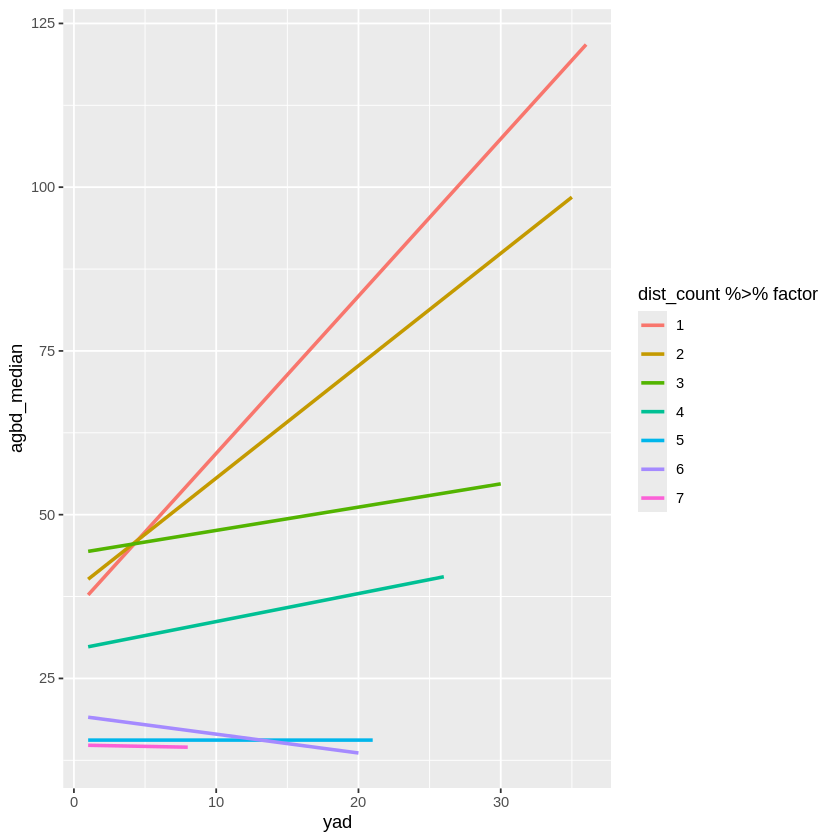

In [50]:
plot_test_dt[dist_count == dist_instance ] %>%
                ggplot(aes(x= yad, y= agbd_median))+
                # xlim(0,40)+
                # ylim(0,200)+
                # # geom_point(aes(color=dist_count %>% factor))+
                # geom_bin2d()+
                geom_smooth(aes(color=dist_count %>% factor),se=F,method = 'lm')
                # facet_wrap(~dist_count,scales='free')